In [9]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns  


In [8]:
df = pd.read_csv("C:\\Users\\jc\\Desktop\\python_projects\\Seasonal Sales Data.csv", encoding = "unicode_escape")   
#to avoid encoding error, use 'unicode_escape

In [ ]:
df.shape


In [10]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#drop blank columns axix = 1 means drop vertical column
df.drop(["Status", "unnamed1"], axis = 1 , inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [13]:
#check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
#drop null values    
df.dropna(inplace= True)    #inplace use for save 

In [16]:
df.shape

(11239, 13)

In [18]:
#change data type 
df["Amount"] = df["Amount"].astype('int')
#astype function use for data type change

In [19]:
df['Amount'].dtypes

dtype('int32')

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
#describe() method returns description of the data in the DataFrame (i.e. count, min, max, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#use describe for specific columns
df[['Age', 'Orders', 'Amount']].describe()

Exploratory Data Analysis

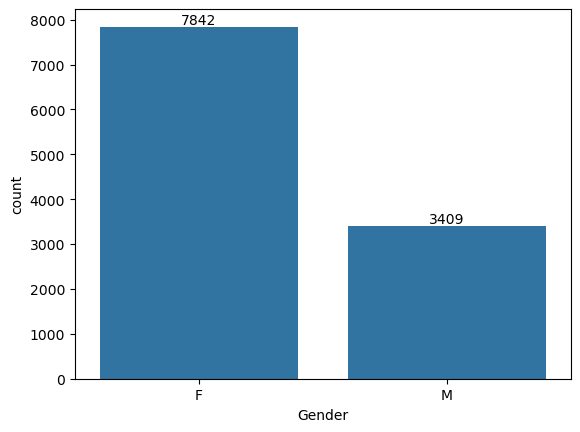

In [11]:
#Gender comparison between buyers
ax = sns.countplot(data = df , x = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

From above graph we can see that most of the buyers are females

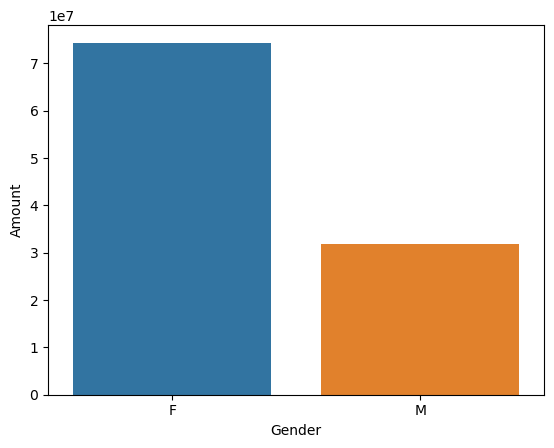

In [14]:
#gender comparison between  purchasing
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x ='Gender', y = 'Amount', hue = 'Gender', data = sales_gen)

plt.show()

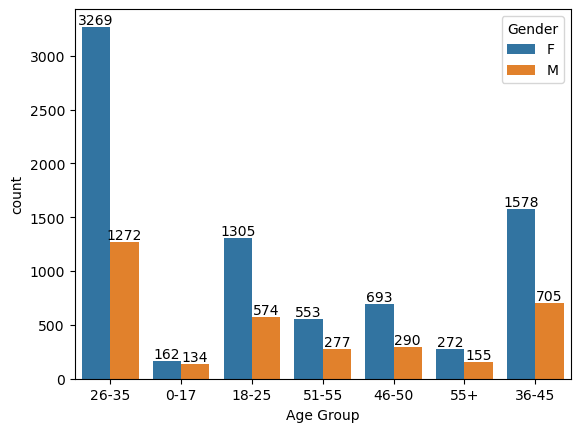

In [35]:
#Age
ax = sns.countplot(data = df , x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

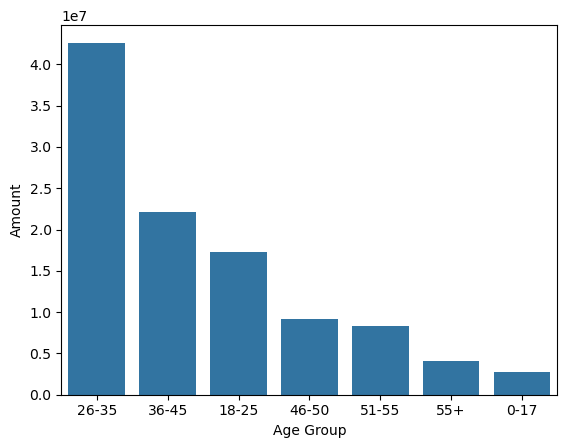

In [38]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

plt.show()

In this graph we can see that most of the buyers of age group  between 26-35 females

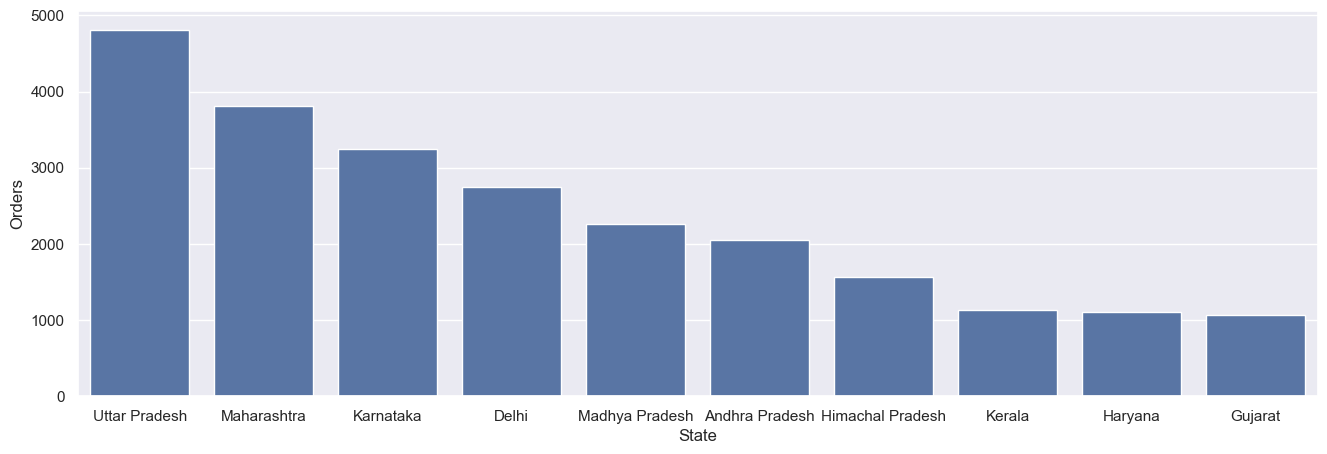

In [5]:
#Total no. of orders  from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)  #top 10 states shows

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot( x = 'State', y = 'Orders',  data = sales_state,)

plt.show()


In [48]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

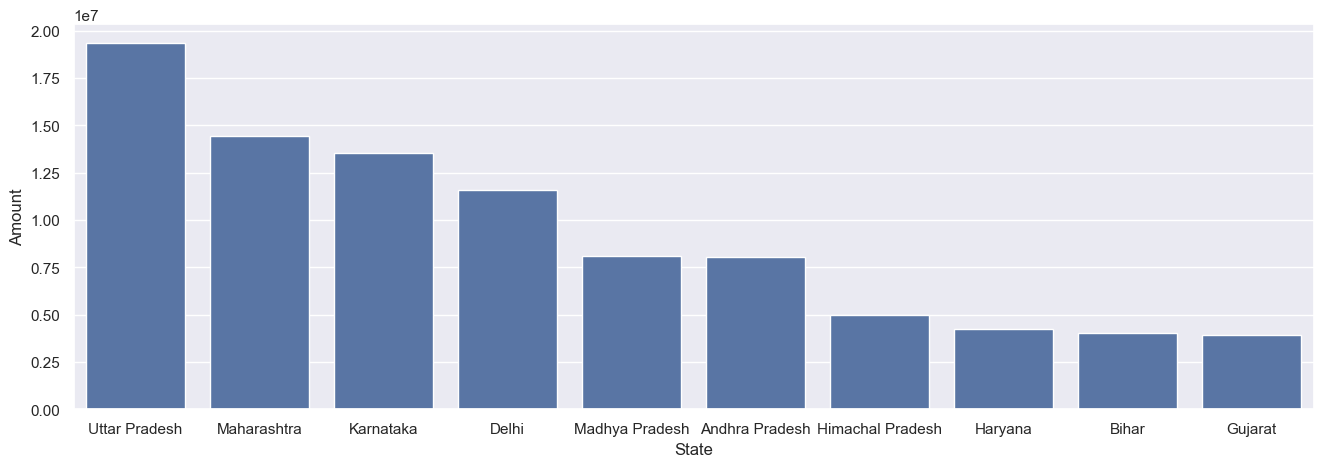

In [49]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)  #top 10 states shows

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot( x = 'State', y = 'Amount',  data = sales_state,)

plt.show()


From above graphs we can see that unexpectedly most of the orders are from uttar Pardesh, Maharashtra and Karnataka respectively
but total sales/amount is from UP, Karnataka and Maharashtra

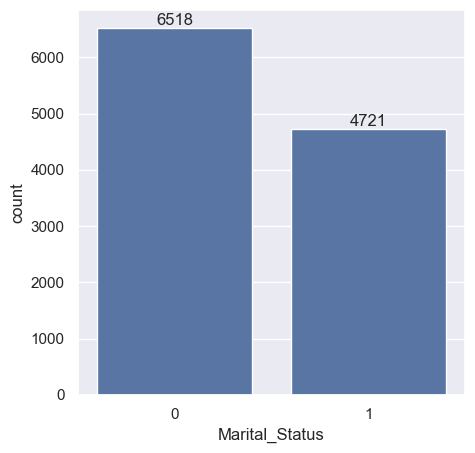

In [56]:
#Matrial Status
ax = sns.countplot(x = 'Marital_Status', data = df)

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

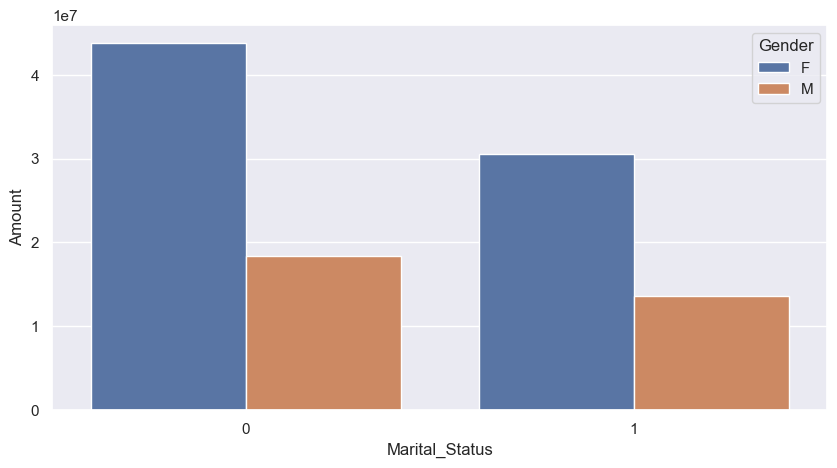

In [15]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False) 


sns.set(rc={'figure.figsize':(10,5)})
sns.barplot( x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_state)

plt.show()

*From above graph we can sede that most of the buyers are married (woman) and they have high purchasing power*

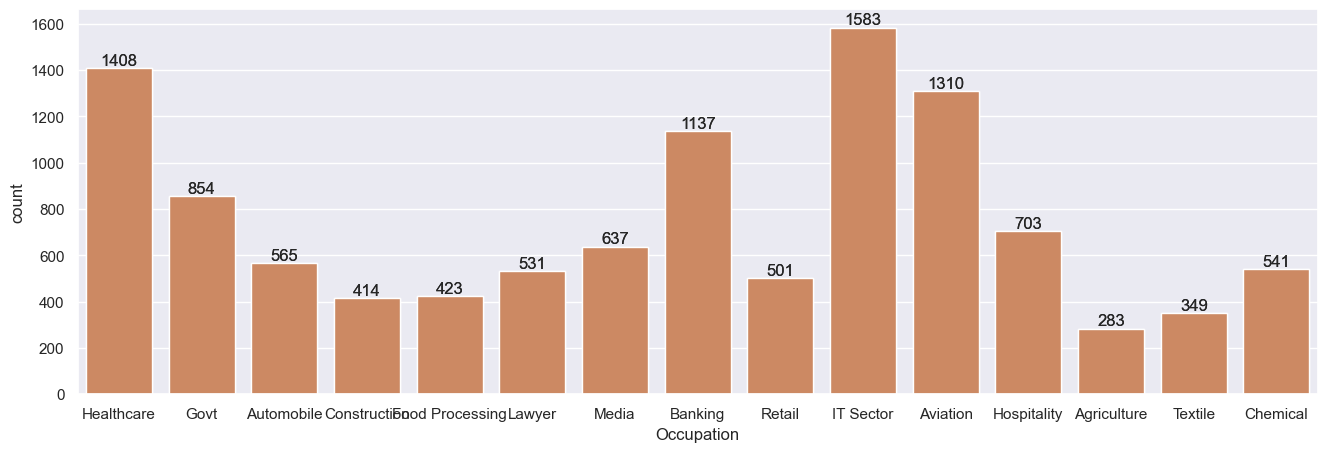

In [65]:
#Occupation
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

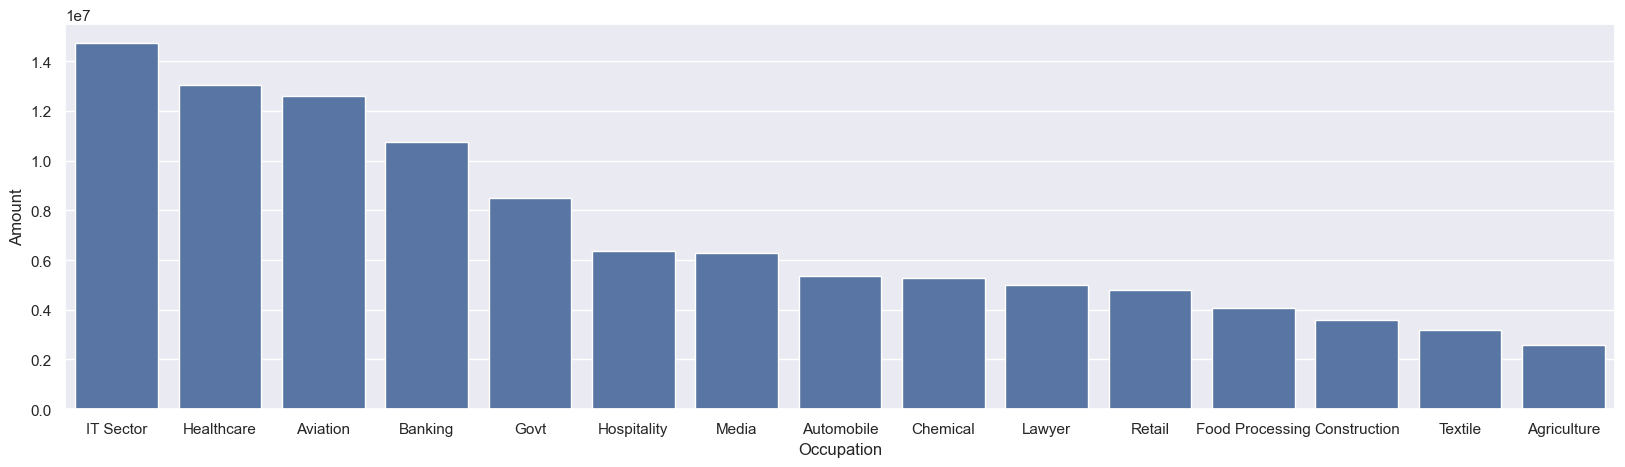

In [66]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False) 


sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'Occupation', y = 'Amount', data = sales_state)

plt.show()

In this graph we can see that most of buyers are from IT Sector, Healthcare and Aviation Sector

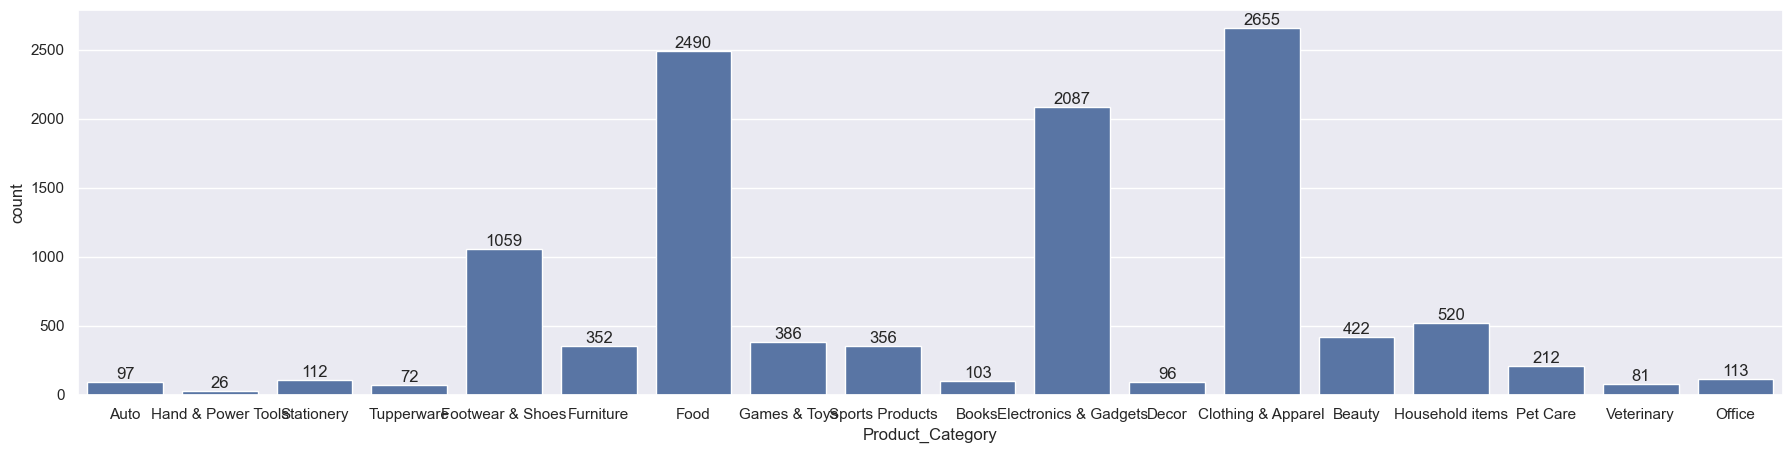

In [68]:
#Product Ctegory
sns.set(rc={'figure.figsize':(22,5)})
ax= sns.countplot(x = 'Product_Category', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

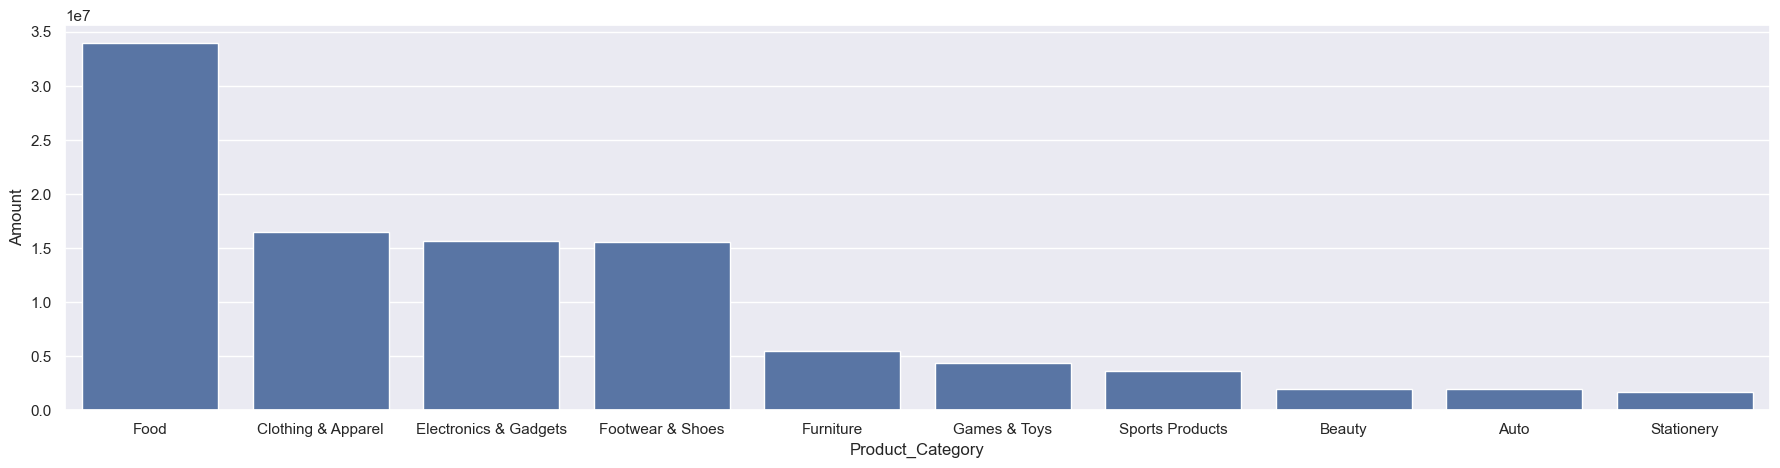

In [71]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)


sns.set(rc={'figure.figsize':(22,5)})
sns.barplot( x = 'Product_Category', y = 'Amount', data = sales_state)

plt.show()

In [ ]:
Most sold products are from Food , Clothing and Electronic category

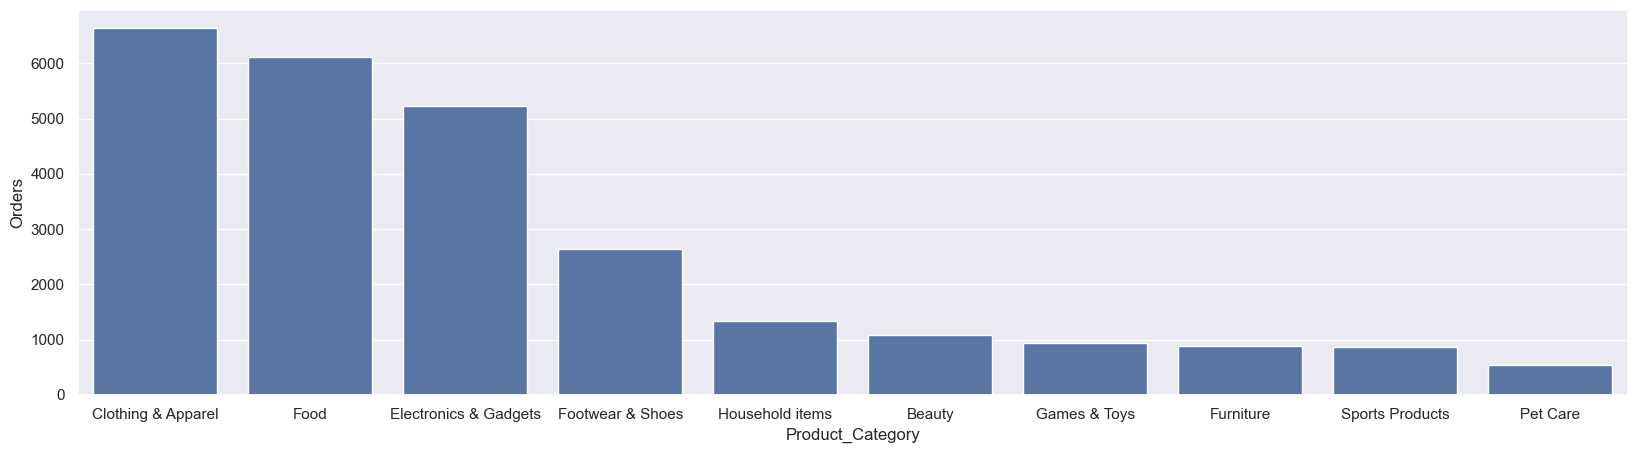

In [77]:
# top 10 most sold products 

sales_state = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(12,5)})
sns.barplot( x = 'Product_Category', y = 'Orders', data = sales_state)

plt.show()

Conclusion

Married woman age group 26-35 yrs from Up, Maharastra and Karnataka working in IT, Healthcare and Avitatio are more likely  buy products from food, 
Clothing and Electronics category

In [79]:
Project Learnings

Perform data cleaning and manipulation
Performed exploratory data analysis(EDA) using pandas, mapplotlib and seaborn libraries
improved customer experience by identifying potential customers across different states, occupation, gender and age groups
improved sales by identifying most selling product categories and roducts, which can help to plain inventory and hence meet the demands 